Ejemplo de regresión lineal

## 1.- Importar las librerias necesarias para el procesamiento de los datos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

## Cargamos los datos del dataset Boston

In [8]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [9]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [10]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
print(boston.data.shape)

(506, 13)


In [12]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#### Unicamente tomaremos los datos del numero de habitaciones (RM)
#### El numero de cuartos se encuentra en la columna 5, recuerden que el conteo comienza desde cero.

## 3.- Selección de las variables dependiente e independiente

In [13]:
df_boston = []

In [43]:
df_boston = pd.DataFrame(boston.data,columns=boston.feature_names)
df_boston['target'] = pd.Series(boston.target)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
df_boston[(df_boston["RM"] <= 4.5) & (df_boston.target < 30)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
367,13.52220,0.0,18.1,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
374,18.49820,0.0,18.1,0.0,0.668,4.138,100.0,1.1370,24.0,666.0,20.2,396.90,37.97,13.8
384,20.08490,0.0,18.1,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63,8.8
406,20.71620,0.0,18.1,0.0,0.659,4.138,100.0,1.1781,24.0,666.0,20.2,370.22,23.34,11.9


In [45]:
df_boston.drop([365, 367, 374, 384, 406], axis=0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [46]:
print(df_boston.shape)

(506, 14)


In [47]:
X = boston.data[:, np.newaxis, 5] 
# Y seran los datos de las etiquetas
y = boston.target

## 4.- Grafica de dispersión de los datos

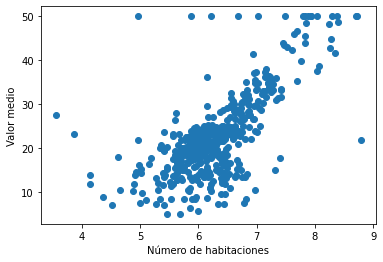

In [48]:
#Colocamos los valores de cada variable
plt.scatter(X,y)
#Asignamos nombre al eje "X"
plt.xlabel("Número de habitaciones")
#Asignamos nombre al eje "Y"
plt.ylabel("Valor medio")
#Mostramos los valores de la grafica
plt.show()

### Implementacion de regresion simple

4.- Selección de los conjuntos de entrenamiento y prueba 

In [49]:
#Importamos el metodo train_test_split
from sklearn.model_selection import train_test_split

In [50]:
#Elegimos aleatoriamente los valores, usando sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

5.- Creación del modelo

In [51]:
y=y.reshape((506,1))

In [52]:
X.shape

(506, 1)

In [53]:
#Creando el objeto de modelado
lr=linear_model.LinearRegression()

In [54]:
#Formateando los datos
#X_train=np.reshape(X_test,(-1,1))
#y_train=np.reshape(y_test,(-1,1))

In [55]:
#Entrenando al modelo
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
Y_pred = lr.predict(X_test)

6.- Graficando los datos ya procesados

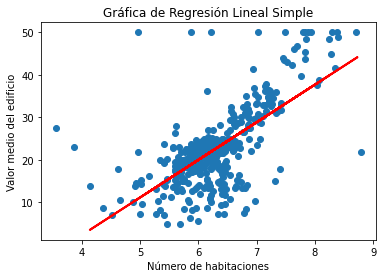

In [57]:
#Colomamos los valores de "X" y "Y"
plt.scatter(X_train, y_train)
#Color y tamaño de la linea
plt.plot(X_test,Y_pred,color='red',linewidth=2)
#Colocamos el titulo de la tabla
plt.title("Gráfica de Regresión Lineal Simple")
#Asignamos nombre al eje "X"
plt.xlabel("Número de habitaciones")
#Asignamos valor al eje "Y"
plt.ylabel("Valor medio del edificio")
#Mostramos la grafica
plt.show()

In [58]:
print("DATOS DEL MODELO")
print()
print('Valor de la pendiente o del coeficiente "a"')
print(lr.coef_)
print()
print('Valor de la interseccion o del coeficiente "b"')
print(lr.intercept_)
print()
print("La ecuacion del modelo es igual a")
print('y= ',lr.coef_, 'X= ',lr.intercept_)

DATOS DEL MODELO

Valor de la pendiente o del coeficiente "a"
[8.8432684]

Valor de la interseccion o del coeficiente "b"
-33.03768250090258

La ecuacion del modelo es igual a
y=  [8.8432684] X=  -33.03768250090258


In [59]:
print('Presición del modelo')
print(lr.score(X_train, y_train))

Presición del modelo
0.4522284571161166
